###  Partial report: 
Given a city aerial image, let's try how to best extract which areas are mainly building areas.


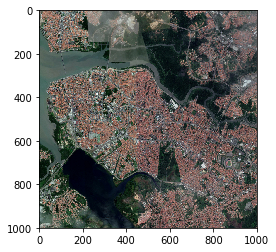

In [72]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
img = imageio.imread('PNGimages/saoluis.png')
plt.imshow(img)

Text(0.5,1,'Blue')

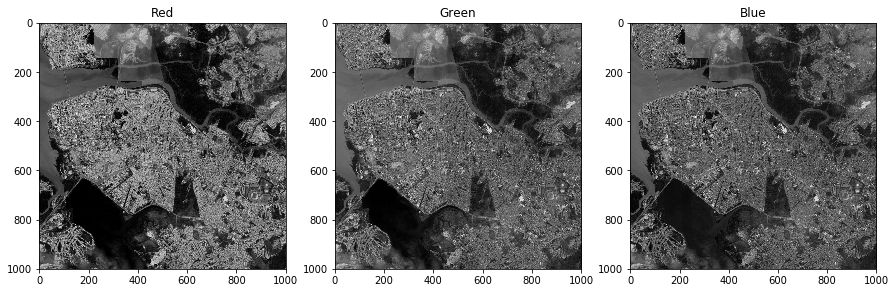

In [73]:
# showing each channel separately
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]
plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(r, cmap="gray"); plt.title("Red")
plt.subplot(132); plt.imshow(g, cmap="gray"); plt.title("Green")
plt.subplot(133); plt.imshow(b, cmap="gray"); plt.title("Blue")



Apparently, city areas tend to be more reddish gray, at least for brazilian cities. Trying not to bump plain soil will maybe be difficult for the scope of the project, let me try at least to exclude vegetation and water areas,  

First, we use established vegetation indices to find how to better exclude it.

Text(0.5,1,'VVI')

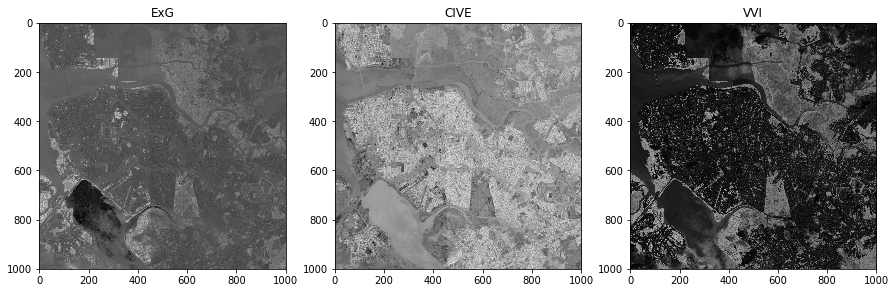

In [76]:
# try different indices to detect vegetation areas
r = r.astype(float)
g = g.astype(float)
b = b.astype(float)
R = r/abs(r+g+b+10)
G = g/abs(r+g+b+10)
B = b/abs(r+g+b+10)

ExG = 2*G - R - B
CIVE = 0.441*r - 0.811*g + 0.385*b + 18.787
RGBo = np.array([40,60,10])
VVI = (1 - abs(((r+10)-RGBo[0]) / ((r+10)+ RGBo[0]))) 
VVI *=  (1 - abs(((g+10)-RGBo[1]) / ((g+10)+ RGBo[1])))
VVI *=  (1 - abs(((b+10)-RGBo[2]) / ((b+10)+ RGBo[2]))) 

plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(ExG, cmap="gray"); plt.title("ExG")
plt.subplot(132); plt.imshow(CIVE, cmap="gray"); plt.title("CIVE")
plt.subplot(133); plt.imshow(VVI, cmap="gray"); plt.title("VVI")

It seems ExG(maybe in higher contrast) and VVI select vegetation well. Let's try to adapt them to select water bodies. 

Text(0.5,1,'VWI')

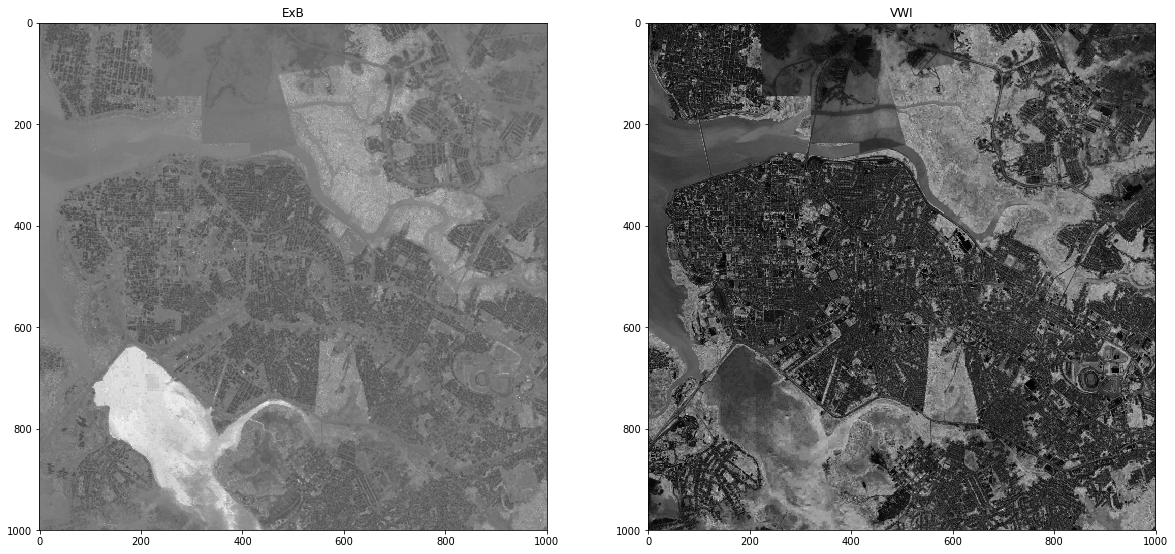

In [79]:
# adapt indices experimenting with parameters
ExB = 10*B - 10*R - G
RGBo = np.array([10,60,100])
VWI = (1 - abs(((r+10)-RGBo[0]) / ((r+10)+ RGBo[0]))) 
VWI *=  (1 - abs(((g+10)-RGBo[1]) / ((g+10)+ RGBo[1])))
VWI *=  (1 - abs(((b+10)-RGBo[2]) / ((b+10)+ RGBo[2])))
plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(ExB, cmap="gray"); plt.title("ExB")
plt.subplot(122); plt.imshow(VWI, cmap="gray"); plt.title("VWI")

It's still getting a lot of forest areas, but thats expected, since river and sea regions have strong green components, so vegetation is still caught by this improvised water indices.
Just to satisfy our curiosity, lets apply a red version of the filters, as to catch soil.

Text(0.5,1,'VSI')

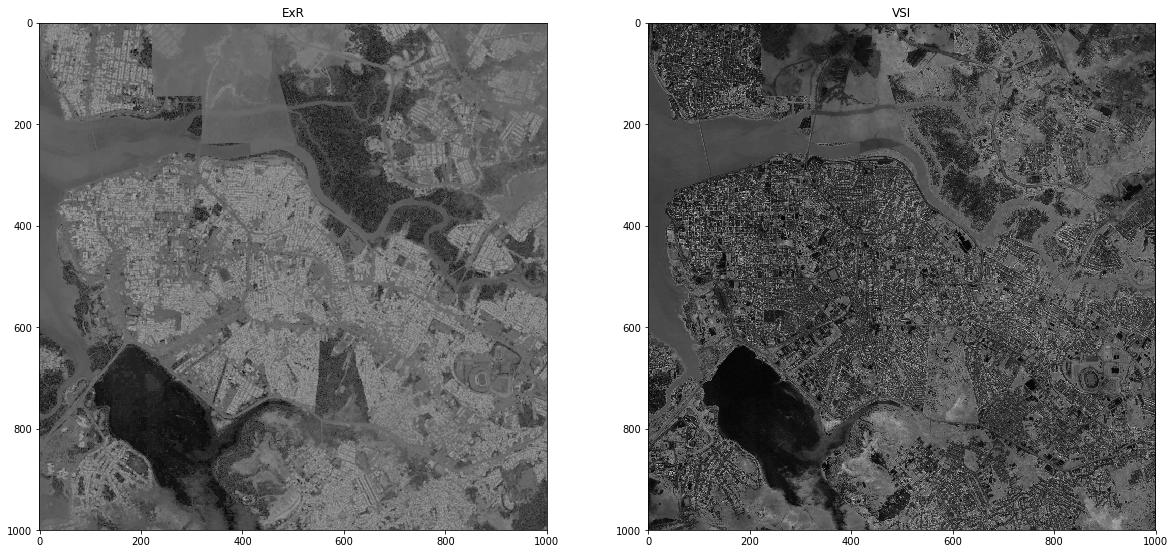

In [84]:
# adapt indices experimenting with parameters
ExR = 2*R - B - G
RGBo = np.array([100,40,40])
VSI = (1 - abs(((r+10)-RGBo[0]) / ((r+10)+ RGBo[0]))) 
VSI *=  (1 - abs(((g+10)-RGBo[1]) / ((g+10)+ RGBo[1])))
VSI *=  (1 - abs(((b+10)-RGBo[2]) / ((b+10)+ RGBo[2])))
plt.figure(figsize=(20,10))
plt.subplot(121); plt.imshow(ExR, cmap="gray"); plt.title("ExR")
plt.subplot(122); plt.imshow(VSI, cmap="gray"); plt.title("VSI")

Maybe it has interesting information, but is best to stick to the exclusion of blue and green versions for the moment.